In [ ]:
# OCR - pre processing techiniques
import pytesseract
from pytesseract import Output

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image, ImageOps
import re

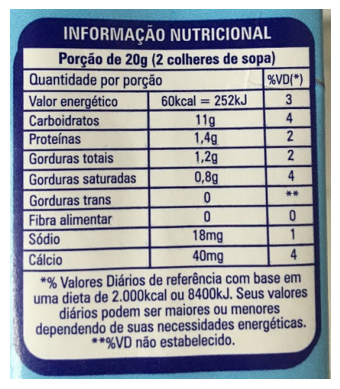

In [3]:
# 이미지 로드
img = Image.open('./content/terms/informacao_nutricional.jpg')
img_cv = np.array(img)
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
# 텍스트 추출
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(img_cv, lang='por', config=config_tesseract)
print(text)

NameError: name 'pytesseract' is not defined

In [5]:
# 텍스트 추출 후 파일기록
full_text = ''
txt_file = 'results_ocr.txt'

directory_imgs = "./content/terms/"
paths = [os.path.join(directory_imgs, f) for f in os.listdir(directory_imgs)]
print(paths)

for image in paths:
    print(image)

['./content/terms/artigo_introducao_vc.jpg', './content/terms/caixa-refrigerador.jpg', './content/terms/ebook_sistemasoperacionais.jpg', './content/terms/informacao_nutricional.jpg', './content/terms/prefacio_tanenbaum.jpg', './content/terms/receita02.jpg', './content/terms/referencias_artigo.jpg']
./content/terms/artigo_introducao_vc.jpg
./content/terms/caixa-refrigerador.jpg
./content/terms/ebook_sistemasoperacionais.jpg
./content/terms/informacao_nutricional.jpg
./content/terms/prefacio_tanenbaum.jpg
./content/terms/receita02.jpg
./content/terms/referencias_artigo.jpg


In [6]:
for image in paths:
    img = Image.open(image)
    file_image = os.path.split(image)[-1]
    file_image_separate = '=================\n' + str(file_image)
    full_text = full_text + file_image_separate + '\n'

    text = pytesseract.image_to_string(img_cv, lang='por', config=config_tesseract)
    full_text = full_text + text

print(full_text)

file_txt = open(txt_file, 'w+')
file_txt.write(full_text + '\n')
file_txt.close()

NameError: name 'pytesseract' is not defined

In [ ]:
# 찾고자 하는 단어 정의
# 저장한 텍스트 파일에서 찾기
term_search = 'computador'          # 포르투갈어로 computer

with open('./results_ocr.txt') as f:
    results = [i.start() for i in re.finditer(term_search, f.read())]

In [ ]:
print(results)

In [ ]:
# 이미지 읽어서 바로 검색
for image in paths:
    img = Image.open(image)
    file_img = os.path.split(image)[-1]
    print('=============\n' + str(file_img))
    text = tesseract_ocr(img, config_tesseract)
    results = [i.start() for i in re.finditer(term_search, text)]
    print('Number of times the term {} appears: {}'.format(term_search, len(results)))
    print('\n')

In [8]:
!pip install wordcloud

In [17]:
!pip install spacy

  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.9 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.9 MB 8.9 MB/s eta 0:00:02
   --------------- ------------------------ 5.5/13.9 MB 10.5 MB/s eta 0:00:01
   -------------------------- ------------- 9.2/13.9 MB 12.4 MB/s eta 0:00:01
   ------------------------------------- -- 13.1/13.9 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 13.9/13.9 MB 13.7 MB/s  0:00:01
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   ---------------------------------------- 632.6/632.6 kB 4.7 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.9 MB/s  0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------ ---------------------

In [ ]:
# https://spacy.io
!python -m spacy download en
# !python -m spacy download ko
!python -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')

✘ No compatible package found for 'ko' (spaCy v3.8.7)

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.8.0/pt_core_news_sm-3.8.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
import spacy

nlp = spacy.load('pt')          # en

ModuleNotFoundError: No module named 'spacy'

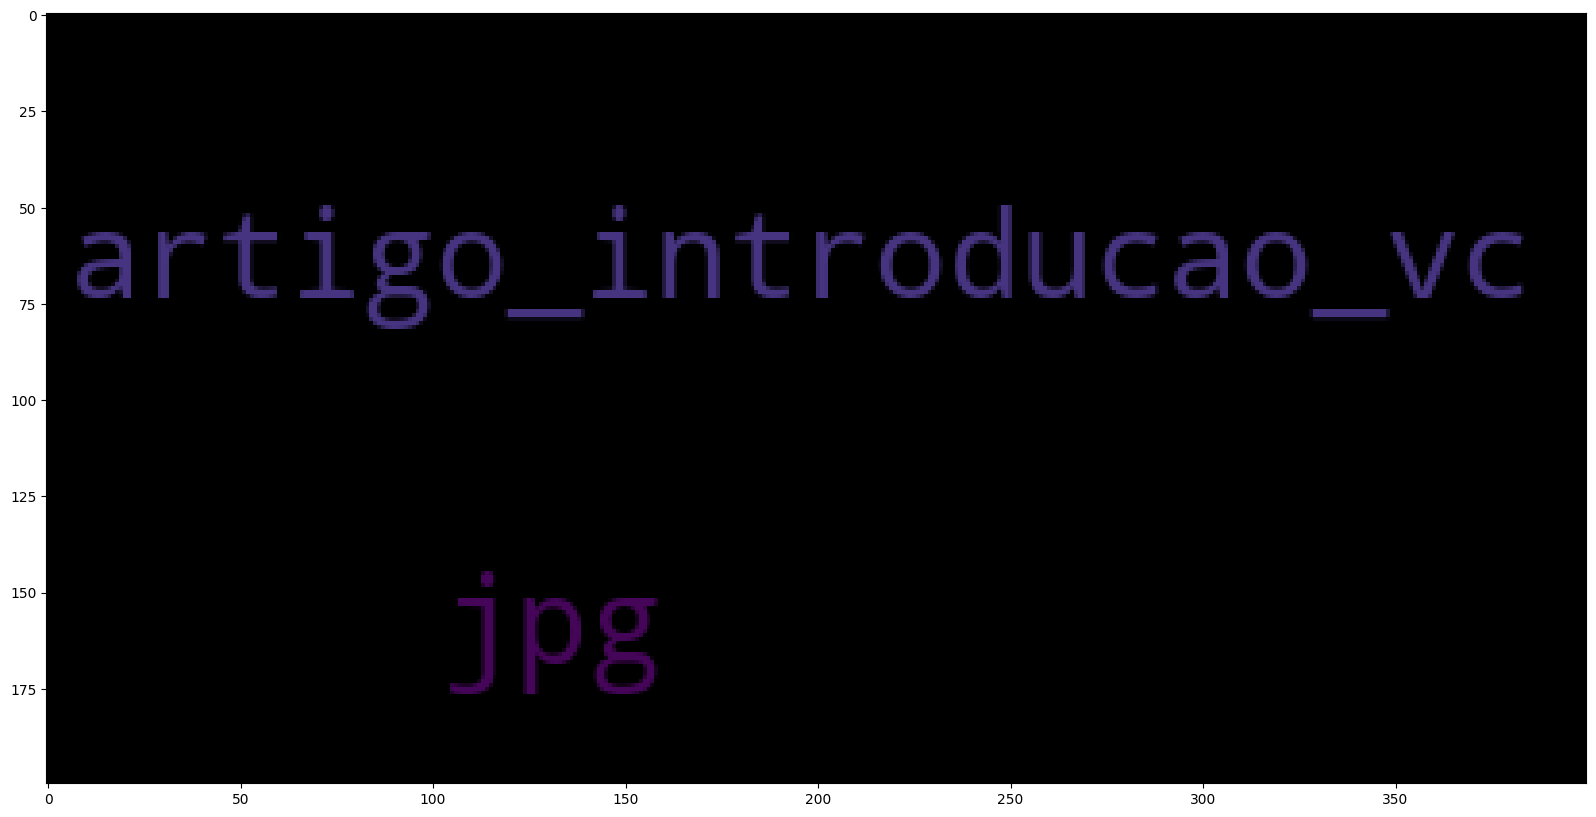

In [14]:
# Word cloud
from wordcloud import WordCloud

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud().generate(full_text))

In [23]:
font = '/content/calibri.ttf'
min_conf = 30

def write_text(text, x, y, img, font, color=(50, 50, 255), font_size=16):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-font_size), text, font = font, fill = color)
  img = np.array(img_pil)

  return img

def box(i, result, img, color=(255, 100, 0)):
  x = result["left"][i]
  y = result["top"][i]
  w = result["width"][i]
  h = result["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

def ocr_searching_term_image(img, term_search, config_tesseract, min_conf):
    result = pytesseract.image_to_data(img, config=config_tesseract, lang='eng+kor+kor_vert', output_type=Output.DICT)
    number_of_times = 0
    for i in range(0, len(result['text'])):
        confidence = int(result['conf'][i])
        if confidence > min_conf:
            text = result['text'][i]
            if term_search.lower() in text.lower():
                x, y, img = box(i, result, img, (0,0,255))
                img = write_text(text, x, y, img, font, (50, 50, 255), 14)
                number_of_times += 1
    return img, number_of_times

In [ ]:
# 찾고자하는 단어 sopa
term_search = 'sopa'
os.makedirs('processed_images', exist_ok = True)

In [25]:
for image in paths:
    # print(image)
    img_plt = Image.open(image)
    img = np.array(img_plt)
    img_original = img.copy()
    file_image = os.path.split(image)[-1]
    img, number_of_times = ocr_searching_term_image(img, term_search, config_tesseract, min_conf)
    if number_of_times > 0:
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()
        new_file_image = 'processed_' + file_image
        new_image = './content/processed_images/' + str(new_file_image)
        cv2.imwrite(new_image, img)

NameError: name 'config_tesseract' is not defined